In [20]:
# Enter your name here: Ritu Gupta 

In [21]:
# Standard Headers
# You may add additional headers here if needed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
import seaborn as sns


# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# print your pandas version
pd.__version__ 

'2.2.0'

# Assignment 1: Data Preprocessing

## Part 1: Data Cleaning, Exploration, and Feature Engineering

For this part of the assignment you'll be using the 1994 Adult Census Income dataset (`adult.csv`) collected by Ronny Kohavi and Barry Becker. It contains 32,561 records with 14 features.

Q1. Read the dataset from `adult.csv` into a Pandas dataframe. You can find more on reading CSV (Comma Separated Values) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

**Important:**
* Notice in the csv file that `?` is used to indicate missing values. We want all of the missing values to be represented by NaNs in the dataframe. Make sure that all of the `?` are converted to `NaN` in your dataframe.
* Also, set the `skipinitialspace` parameter to `True`. (This strips the spaces after the commas off of the data which will be necessary for things to work correctly later in the assignment!)
* Display the head of your dataframe.

In [22]:
# your code goes here
data = pd.read_csv('adult.csv', header= 'infer', skipinitialspace = True, na_values='?')

data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,NaN,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,54.0,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K


Q2. Start by looking for missing values. How many missing values are there in this dataset?

In [23]:
# your code goes here
nan_count = data.isna().sum()

#per column
print(nan_count)

#in total
total_missing = nan_count.sum()
print("The total number of missing values is: " + str(total_missing))

age                 28
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64
The total number of missing values is: 4290


Q3. Clean up some of the missing values. 
* Drop all of the records from the dataset that are missing `occupation` or `workclass`.
* For records missing values in `native-country`, impute those by using a "forward fill." This will fill in the missing value with the same value as the previous record. 
* For records missing `age`, leave those as-is for now. We will do a similar-case imputation on them later! 

Print something to show that there are no longer missing values in `workclass`, `occupation`, or `native-country`.

In [24]:
# your code goes here
#dropping records that are missing occupation or workclass
data_cleaned = data.dropna(subset=['occupation', 'workclass'])

#imputing values by using a forward fill
data_cleaned.loc[:, 'native-country'] = data_cleaned['native-country'].ffill()

#reprinting to show that the missing values from those columns have been dropped
nan_count = data_cleaned.isna().sum()
print(nan_count)

age               28
workclass          0
education          0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


Q4. Explore the data:
* How is the dataset distributed between people who make <=50K income and those who make >50K income? 
* How is the dataset distributed between males & females?
* Create a plot to show the distribution of the datset by `education`.
* Create a plot to show the distribution of the ages in the dataset.

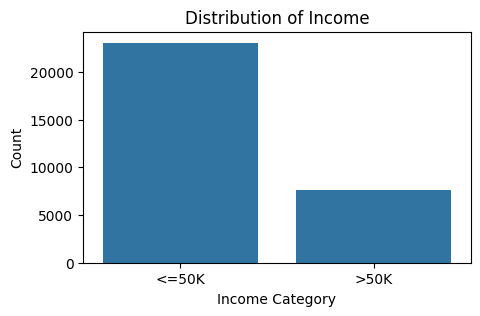

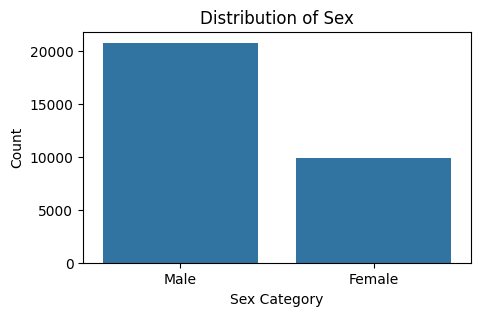

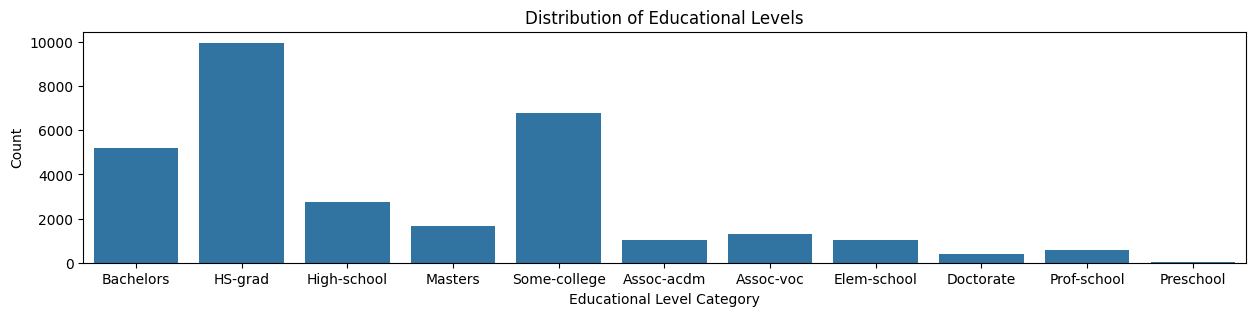

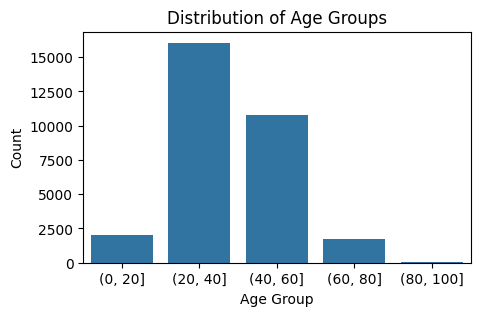

In [25]:
# your code goes here
plt.figure(figsize=(5, 3)) #controlling the size of the plot
sns.countplot(x='income', data=data_cleaned) #the distribution of the dataset

plt.title('Distribution of Income')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()
#The dataset is more representative of those who make <= 50k (~23000) versus those who make > 50k (~7500). 

#################################
plt.figure(figsize=(5, 3))
sns.countplot(x='sex', data=data_cleaned)

# Add title and labels
plt.title('Distribution of Sex')
plt.xlabel('Sex Category')
plt.ylabel('Count')


plt.show()

#The dataset is more representative of men (~20000) versus women (~10000). 

#################################
plt.figure(figsize=(15, 3))
sns.countplot(x='education', data=data_cleaned)

plt.title('Distribution of Educational Levels')
plt.xlabel('Educational Level Category')
plt.ylabel('Count')
plt.show()


#################################
data_cleaned_age = data_cleaned.dropna()
bins = [0, 20, 40, 60, 80, 100]

# bin the age column
data_cleaned_age = data_cleaned.copy() #avoided the setting with copy warning
data_cleaned_age.loc[:, 'age_bin'] = pd.cut(data_cleaned_age['age'], bins)


plt.figure(figsize=(5, 3))
sns.countplot(x='age_bin', data=data_cleaned_age)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


Q5. Create a plot to determine if there are any outliers in the  `capital-gain` column.  
Answer as a comment: What values would you consider to be outliers in this column? Explain why.

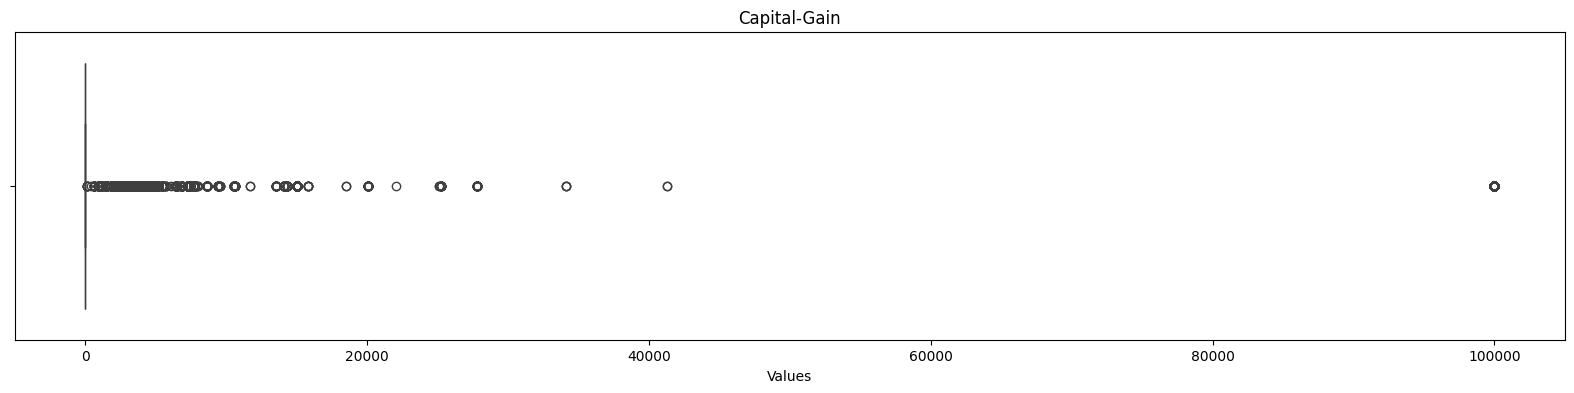

"\nThose that I would consider to be outliers in this column would be those with a capital-gain exceeding 80000.\nWhile the majority of people have a capital gain between 0 and 10000, I wouldn't necessarily consider those\nwith a capital-gain from 20000 to 30000 to stray heavily from the norm. However, the group with a\ncapital gain of 90000-100000 is markedly outside of the norm and could heavily skew results, and should probably\nbe removed. \n\n"

In [26]:
# your code goes here
plt.figure(figsize = (20, 4))
sns.boxplot(x = data_cleaned['capital-gain'])

plt.title('Capital-Gain')
plt.xlabel('Values')
plt.show()


'''
Those that I would consider to be outliers in this column would be those with a capital-gain exceeding 80000.
While the majority of people have a capital gain between 0 and 10000, I wouldn't necessarily consider those
with a capital-gain from 20000 to 30000 to stray heavily from the norm. However, the group with a
capital gain of 90000-100000 is markedly outside of the norm and could heavily skew results, and should probably
be removed. 

'''


Q6. Using the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html), group the data by  `marital-status`. 

Display each marital status along with it's mean age, in sorted order from least to greatest.

In [27]:
# your code goes here
grouped_status = data_cleaned.groupby('marital-status')['age'].mean()
df_grouped = grouped_status.reset_index(name='mean-age')
sorted_df = df_grouped.sort_values(by='mean-age')
display(sorted_df)

,marital-status,mean-age
4,Never-married,28.471218
1,Married-AF-spouse,31.250000
5,Separated,39.507821
3,Married-spouse-absent,40.290488
2,Married-civ-spouse,42.770487
0,Divorced,42.896333
6,Widowed,57.742857


Q7. Now fill in those missing age values, using similar case imputation. For each missing age, fill it in with the **median** age of that person's marital-status category. Use **median** rather than mean for this, so that we only use whole numbers for ages. 

Specifically display the records with row IDs 35, 216, and 1120.

In [28]:
# your code goes here
median_age_by_status = data_cleaned.groupby('marital-status')['age'].median()

data_imputed = data_cleaned.copy()
data_imputed['age'] = data_imputed['age'].fillna(data_imputed.groupby('marital-status')['age'].transform(lambda x: x.fillna(x.median())))

rows_display = [35, 216, 1120]
display(data_imputed.loc[rows_display])


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
35,26.0,Private,High-school,7,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico,<=50K
216,42.0,Private,Assoc-acdm,12,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
1120,42.0,Private,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K


Q8. Display everyone who is over 90 years old.  

In [29]:
# your code goes here
mask = data_imputed['age'] > 90
display(data_imputed[mask])

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
222,91.0,Private,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
5272,94.0,Private,High-school,5,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
32277,91.0,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
32367,93.0,Local-gov,Elem-school,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K


Q9. Create a scatter plot between `age` and `hours-per-week` **for only the first 100 datapoints in the dataset.**  
Place `age` on the X axis. Color each datapoint according to their income - one color for those that make <=50K, and another color for those that make >50K.

Answer as a comment: What observations or insights can you make by looking at this plot?

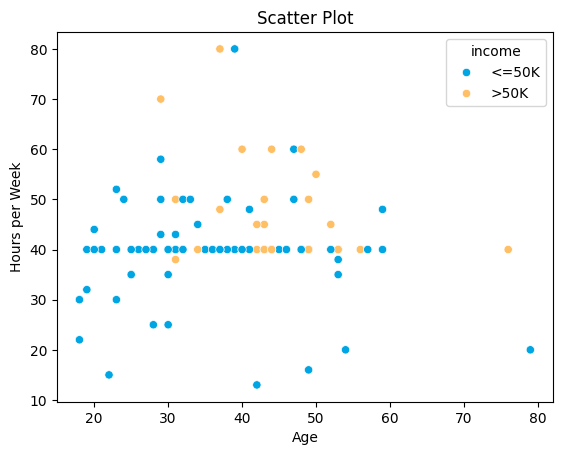

'\nSome of the insights that can be drawn from the graph is that the majority of people are either working a 9-5 \n(delineated by the line formed by the points at 40 hours a week) or more than that, with the max being 80 hours a \nweek. Additionally, the majority of those making > 50k are either working 40 hours a week or more, meaning they \ncould have multiple jobs or are working jobs with heavy hours (IB core). Additionally, people ages 30-50 seem to \nwork the most hours out of all the ages represented. The majority of people making > 50k are over the age of 30, \nas they are more likely to be settled into their career and not working entry level jobs with lower pay. \n\n'

In [30]:
# your code goes here
colors = {'<=50K': '#00a5e3', '>50K': '#ffbf65'}
sns.scatterplot(x = 'age', y = 'hours-per-week', data = data_imputed.head(100), hue='income', palette= colors)

plt.title('Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()

'''
Some of the insights that can be drawn from the graph is that the majority of people are either working a 9-5 
(delineated by the line formed by the points at 40 hours a week) or more than that, with the max being 80 hours a 
week. Additionally, the majority of those making > 50k are either working 40 hours a week or more, meaning they 
could have multiple jobs or are working jobs with heavy hours (IB core). Additionally, people ages 30-50 seem to 
work the most hours out of all the ages represented. The majority of people making > 50k are over the age of 30, 
as they are more likely to be settled into their career and not working entry level jobs with lower pay. 

'''

Q10. Feature engineering: Using the dictionary provided below, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for Series [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html). Display the head of the new dataframe.

In [31]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Asia',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
}

In [32]:
# You will want to create a deep copy of the initial dataframe object
# so that you can run this cell multiple times without errors.
data_imputed_copy = data_imputed.copy()

# add the new column to adult_data_copy
# your code goes here
data_imputed_copy['continent'] = data_imputed_copy['native-country'].map(continent_dict)
data_imputed_copy.head()


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,continent
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North-America
1,42.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North-America
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North-America
3,53.0,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North-America
5,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,North-America


Q11. Plot a bar graph showing the average age of adults from each continent, and show the standard deviations on the same graph.

An example bar plot with standard deviation bars:
<img src="imgs/screen5.png" width=200>

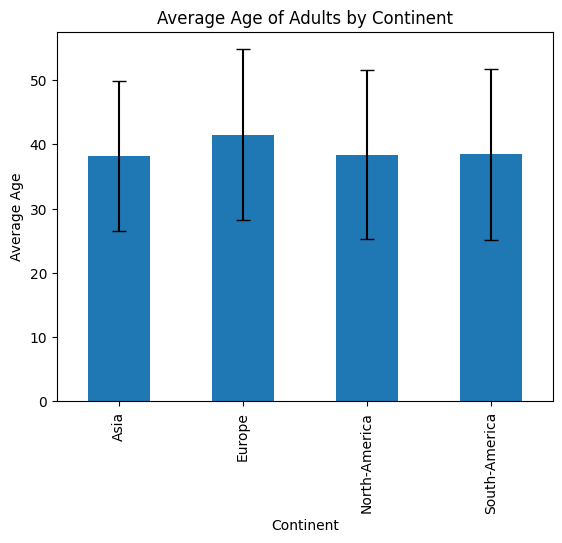

In [33]:
# your code goes here
mean_continent_age = data_imputed_copy.groupby('continent')['age'].agg(['mean', 'std'])

age_data = mean_continent_age['mean'].plot(kind ='bar', yerr = mean_continent_age['std'], capsize = 5)
plt.xlabel('Continent')
plt.ylabel('Average Age')
plt.title('Average Age of Adults by Continent')
plt.show()


Q12. To reduce the dimensionality of this dataset via feature selection, which attribute or attributes would you eliminate? Explain why as a comment.

In [34]:
'''Explain here (as a comment):

It's hard to say what attributes I would eliminate, as it truly depends on the predictive task at hand, but if I
had to remove a few attributes, I guess I would remove occupation. I would remove this as your educational level
makes some careers inaccessible to you, especially higher paying ones. However, we already capture this as we note
if they're making over or under 50k, so I feel like we lose the least amount of information through removing
the occupation attribute. 

'''

"Explain here (as a comment):\n\nIt's hard to say what attributes I would eliminate, as it truly depends on the predictive task at hand, but if I\nhad to remove a few attributes, I guess I would remove occupation. I would remove this as your educational level\nmakes some careers inaccessible to you, especially higher paying ones. However, we already capture this as we note\nif they're making over or under 50k, so I feel like we lose the least amount of information through removing\nthe occupation attribute. \n\n"

## Part 2: Data Scaling and Dimensionality Reduction

For this part you'll be using a subset of the leaf dataset created by professors from University of Porto, Portugal. This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species, but for the purpose of this assignment we're only going to consider 4 plant species.

<img src="imgs/screen4.png">

Q13. Read the dataset from `leaf.csv` into a dataframe. Display the head of the dataframe.

In [35]:
# your code goes here
leaf_data = pd.read_csv('leaf.csv', header= 'infer', na_values='?')
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,NaN,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q14. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. As a comment, explain how you would handle these missing values, then go ahead and handle them (in code). Display the resulting head of the dataframe.

In [36]:
# your code goes here

'''
At first, I was thinking about possibly dropping the values, until I found out 5/52 rows were missing the value for
eccentricity, which is almost 10% of the dataset. I thought that mean wouldn't be the best option either as there's
quite some variation in the values for eccentricity. From there, I decided that it would be best to use k-nearest
neighbors imputation. It's a smaller dataset, and there seemed to be distinct groups based on a few factors, so it
made the most sense to me. 
'''

imputer = KNNImputer(n_neighbors=3)
leaf_data_imputed = pd.DataFrame(imputer.fit_transform(leaf_data), columns= leaf_data.columns)
display(leaf_data_imputed.head())


,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1.0,0.426503,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4.0,0.995120,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3.0,0.192870,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1.0,0.522120,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3.0,0.332540,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q15. Data scaling: Standardize the features in the `leaf_data` dataset so that all of the features are on the same scale.

* Use `sklearn.preprocessing.StandardScaler` to standardize the dataset’s features. Call `.fit_transform` to calculate the scaled data (fit) and replace the existing data with the scaled data (transform).
* Note that `fit_transform` returns a numpy array. Put your scaled data back into a DataFrame by doing something like this (subsitute your variable names): `scaled_data = DataFrame(numpy_array_data, columns=leaf_data.columns)`
* Display something to show that the data has been scaled correctly (the head of the data frame, *and/or* the mean of each column which should be ~0, *and/or* the standard deviation of each column which should be ~1.)

In [37]:
# your code goes here
scaler = StandardScaler()
leaf_data_imputed = scaler.fit_transform(leaf_data_imputed)
scaled_data = pd.DataFrame(leaf_data_imputed, columns=leaf_data.columns)
display(scaled_data.head())

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,-1.196975,-0.540603,-0.531196,0.395212,-1.262773,-0.441095,-0.875478,1.116108,0.890913,-0.358758,-0.276976,-0.366061,-0.335186,-0.446737,-0.263256
1,1.470569,1.716685,1.447597,1.416854,0.559789,0.714453,-0.809227,-0.740953,-0.688901,-0.579956,-0.734593,-0.674961,-0.813314,-0.456439,-0.533339
2,0.581388,-1.468078,-0.522047,-1.012484,0.638209,0.692846,0.299095,-0.681097,-0.674420,0.557730,0.823063,0.635813,0.761190,0.043125,0.764238
3,-1.196975,-0.161025,-0.508525,0.691019,-1.598947,-1.434686,-0.953551,1.524256,1.551250,-0.417379,-0.354676,-0.423053,-0.379852,-0.496638,-0.322750
4,0.581388,-0.913618,-0.508165,-0.922422,0.637376,0.692846,0.395487,-0.588718,-0.647312,2.227521,1.846307,1.882116,1.424579,1.512359,2.769444


Q16. Dimensionality reduction using PCA

* Use `sklearn.decomposition.PCA` to perform PCA on the **scaled** data.
* Set `n_components` to 0.95 and `svd_solver` to 'full', so that the PCA will reduce the number of dimensions to however many dimensions are necessary to retain 95% of the variance. 
* Use `.fit_transform` to calculate the dimensionality reduction (fit) and to replace the existing data with the transformed data (transform). 
* Note that `fit_transform` returns a numpy array. Put the transformed data back into a Pandas DataFrame by doing something like this (subsitute your variable names): `pca_data = DataFrame(numpy_array_data)`
* Show the head of the resulting DataFrame to make sure the dimensionality has actually been reduced.

In [38]:
# your code goes here
pca = PCA(n_components = .95, svd_solver = 'full')
result = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(result)
display(pca_data.head())

,0,1,2,3
0,-1.825885,-1.874250,0.011987,0.076408
1,-1.396347,3.238071,-1.222002,-0.242754
2,2.417722,-0.184719,0.496567,1.084879
3,-2.640808,-2.464638,-0.454379,-0.210517
4,4.912256,-1.076913,-1.232302,-0.177521
